## Analysing Shakespeare's Work 



## 1. Wordcloud

Wordclouds highlight important textual data points to immediately convey crucial information in extracts. I am using the `wordcloud` library in python to create my wordcloud.

Used the following to install `wordcloud`

    pip install wordcloud
    
Following this, I am importing the `wordcloud`, `matplotlib`, `pandas` and `numpy`. 

In [1]:
# Imports
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#First 244 lines and last 15 lines is copyright information so removing that
# df

### 1.1 Data cleaning 
I have cleaned the text extracts by removing the following:

* Initial contents of the book (first 244 lines and last 15 lines is copyright information)
* Copyright information throughout
* Removing stopwords 

to only highlight crucial words. 

In [2]:
df = pd.read_table("t8.shakespeare.txt", skiprows=[i for i in range(0,244)], engine = 'python', skipfooter =15, header=None)

# Removing the copyright information from the df
copyright_info = '''<<THIS ELECTRONIC VERSION OF THE COMPLETE WORKS OF WILLIAM
SHAKESPEARE IS COPYRIGHT 1990-1993 BY WORLD LIBRARY, INC., AND IS
PROVIDED BY PROJECT GUTENBERG ETEXT OF ILLINOIS BENEDICTINE COLLEGE
WITH PERMISSION.  ELECTRONIC AND MACHINE READABLE COPIES MAY BE
DISTRIBUTED SO LONG AS SUCH COPIES (1) ARE FOR YOUR OR OTHERS
PERSONAL USE ONLY, AND (2) ARE NOT DISTRIBUTED OR USED
COMMERCIALLY.  PROHIBITED COMMERCIAL DISTRIBUTION INCLUDES BY ANY
SERVICE THAT CHARGES FOR DOWNLOAD TIME OR FOR MEMBERSHIP.>>'''

copyright_info = copyright_info.split('\n')
copyright_info.append("by William Shakespeare")    
row_list = [index for index, row in df.iterrows() if row[0] in copyright_info]

df.drop(row_list, axis=0, inplace=True)

Converting the entire text into a string of words. 

In [3]:
comment_words = ''
stopwords_list = pd.read_csv("stopwords.txt",sep=" ", header=None)

for val in df[0]:     
    val = str(val)
    tokens = val.split()
     
    for i in range(len(tokens)):tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

### 1.2 Generating the wordcloud

In [4]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords_list[0],
                min_font_size = 10).generate(comment_words)

### 1.3 Plotting the wordcloud

Using `matplotlib` to plot the wordcloud below.

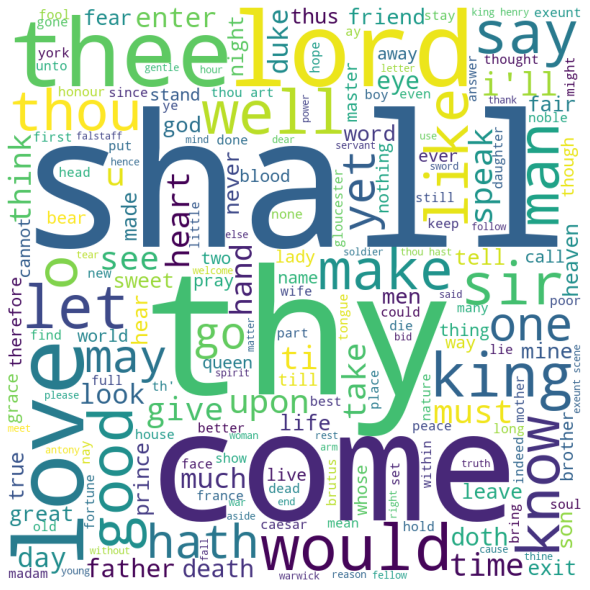

In [5]:
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### 1.4 Average number of words per sentence

Let's calculate the average number of words per sentence for different genres of shakespearean work.

**Poems**: Extracting poem data from the .txt file and creating the dataframe `poem_df`. This dataframe will have sonnets and poems only.


In [6]:
id1=''
id2='0'
data = []
for val in df[0]:
    if val.isdigit() == True: 
        id1=val
        id2='0'
    elif val.replace(' ', '').isdigit(): id2=val.replace(' ', '')
    else:data.append([id1, id2, val])

In [7]:
df2 = pd.DataFrame(data=data, columns=['id1','id2','sentences'])
end_list = [index for index, row in df2.iterrows() if 'THE END' in row['sentences']]

poem_df = df2[0:end_list[0]].append(df2[end_list[-2]+1:end_list[-1]], ignore_index=True)
# poem_df

In [8]:
from statistics import mean

words_per_sentence_in_poems = []

for s in poem_df['sentences']:
    words = s.split()
    words_per_sentence_in_poems.append(len(words))

print("The average number of words per sentence for poems is", mean(words_per_sentence_in_poems))

The average number of words per sentence for poems is 8.103781174577636


**Plays**: Extracting play data from a new .csv file and creating the dataframe `plays_df`. This dataframe will have all the plays.

In [9]:
import pandas as pd

plays = pd.read_csv("Shakespeare_data.csv", keep_default_na = False)

In [10]:
play_title=""
content =""
words=""

plays_data = []

for i, line in enumerate(plays['PlayerLine']):
    
    if (play_title == plays['Play'][i]):
        content += " ".join(line.split())+" "
    else:
        plays_data.append([play_title, content])
        play_title=plays['Play'][i]
        content = " ".join(line.split())+" "

plays_data.pop(0)

['', '']

Creating a function `getType` to categorise various plays into the following genres:
* Comedy
* Tragedy
* History

In [11]:
categories = pd.read_csv("shakespeare_categories.csv", keep_default_na = False)

def getType(title):
    if (categories['comedies'].str.contains(title.lower()).any()): return 'Comedy'
    if (categories['tragedies'].str.contains(title.lower()).any()): return 'Tragedy'
    if (categories['histories'].str.contains(title.lower()).any()): return 'History'
    else: return 'Unknown'

Tokenizing the sentences of the plays to calculate the average words per sentence

In [12]:
import nltk

line_list = []
for i, play in enumerate(plays_data):    
    tokens = nltk.sent_tokenize(play[1])
    play_type = getType(play[0])

    for t in tokens:
        line_list.append([play[0], t, play_type])

In [13]:
plays_df = pd.DataFrame(data=line_list, columns=['PlayTitle','Token','Category'])

from statistics import mean

words_per_sentence_in_plays = []

for i, s in enumerate(plays_df['Token']):
    words = s.split()
    words_per_sentence_in_plays.append(len(words))

            
plays_df['WordCount'] =  words_per_sentence_in_plays
print("The average number of words per sentence for plays is", mean(words_per_sentence_in_plays))

The average number of words per sentence for plays is 14.935225811332174


The average number of words per senetnce across all Shakespere's work can be a mean of the number of words per sentence in all this works. Here we can merge the two lists`words_per_sentence_in_poems` and `words_per_sentence_in_plays`

In [14]:
print("The average number of words per sentence for all of Shakespeare's work is", str(mean(words_per_sentence_in_poems + words_per_sentence_in_plays)))
# print(len(words_per_sentence_in_poems), len(words_per_sentence_in_plays))

The average number of words per sentence for all of Shakespeare's work is 14.628463567067664


In [15]:
cat_df = plays_df.groupby('Category').mean('WordCount')
for cat, mean in enumerate(cat_df["WordCount"]):
    print("The average number of words per sentence for "+cat_df.index[cat]+" is", mean)

The average number of words per sentence for Comedy is 14.436610943827224
The average number of words per sentence for History is 17.128515928515927
The average number of words per sentence for Tragedy is 14.037456613960662


>**Part 1**: The average number of words per sentence for **poems** is ~8 words and for **plays** ~15 words. Overall, for Shakespeare's work, we observe that the mean is ~15 words. This is heavily skewed towards the mean of the play's sentences. After all, the content of plays has about *52,876* sentences while the poems only have about *2486* lines. 

Moreover, categorising by the genre of the plays, the average number of words per sentence 
* for Comedy is ~14 words
* for History is ~17 words
* for Tragedy is ~14 words

We could also normalise them using: 
```
    new_mean = mean([mean(words_per_sentence_in_poems),mean(words_per_sentence_in_plays)])
    print("The average number of words per sentence for plays is", new_mean)
```
which will result in `The average number of words per sentence for plays is 11.519503492954904`


## 2. How many questions does Shakespeare ask?

In this section, we are trying to analyse and calculate the probability that Shakespeare asks a question, the distribution of the number of questions for all his works, the distribution of the number of questions based on genre (comedies, tragedies, histories, sonnets)? 

In [16]:
number_of_questions = []

for i, s in enumerate(plays_df['Token']):
    questions = s.count('?')
    number_of_questions.append(questions)

plays_df['QuestionCount'] =  number_of_questions

print("The probability of asking a question is", sum(number_of_questions)/len(plays_df))

The probability of asking a question is 0.18526363567592102


In [17]:
number_of_questions_poems = []
for s in poem_df['sentences']:
    questions = s.count('?')
    number_of_questions_poems.append(questions)

print("The probability of asking a question for a poem is", sum(number_of_questions_poems)/len(poem_df))

The probability of asking a question for a poem is 0.03982300884955752


Shakespeare's proability of asking a question in his plays is almost **18.5%**! However, the probability of asking a question in his poems is 4%..

#### Distribution of number of questions in Shakespeare's works 

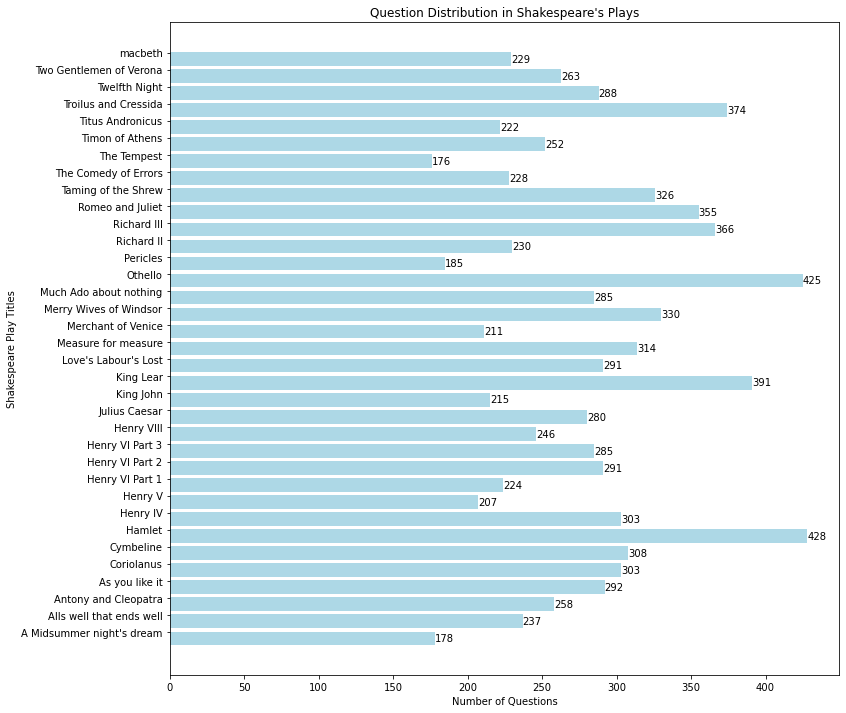

In [18]:
question_df = plays_df.groupby('PlayTitle').sum('QuestionCount')

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig, ax = plt.subplots(figsize=(12,12))    
# width = 0.75 # the width of the bars 
ind = np.arange(len(question_df['QuestionCount'])) 
ax.barh(ind, question_df['QuestionCount'], color="lightblue", align='center')
ax.set_yticks(ind+0.75/2)
ax.set_yticklabels(question_df.index)

for c in ax.containers:
    ax.bar_label(c)
    
plt.title("Question Distribution in Shakespeare's Plays")
plt.xlabel('Number of Questions')
plt.ylabel('Shakespeare Play Titles') 

plt.show()

In [19]:
question_df = plays_df.groupby('PlayTitle').sum('QuestionCount')
question_df['QuestionCount']

PlayTitle
A Midsummer night's dream    178
Alls well that ends well     237
Antony and Cleopatra         258
As you like it               292
Coriolanus                   303
Cymbeline                    308
Hamlet                       428
Henry IV                     303
Henry V                      207
Henry VI Part 1              224
Henry VI Part 2              291
Henry VI Part 3              285
Henry VIII                   246
Julius Caesar                280
King John                    215
King Lear                    391
Love's Labour's Lost         291
Measure for measure          314
Merchant of Venice           211
Merry Wives of Windsor       330
Much Ado about nothing       285
Othello                      425
Pericles                     185
Richard II                   230
Richard III                  366
Romeo and Juliet             355
Taming of the Shrew          326
The Comedy of Errors         228
The Tempest                  176
Timon of Athens              252


In [20]:
# question_df['QuestionCount'].mean()
# question_df['QuestionCount'].var()

Based on exploratory data analysis, this plot doesn't match any pdf. 

I am assuming it may match **Poisson** distribution (of course, I have to invert the graph to see that properly) with a mean around ~279 questions. The plays have to be sorted and can be represented as a Poisson distribution function. So, I am sorting it below:

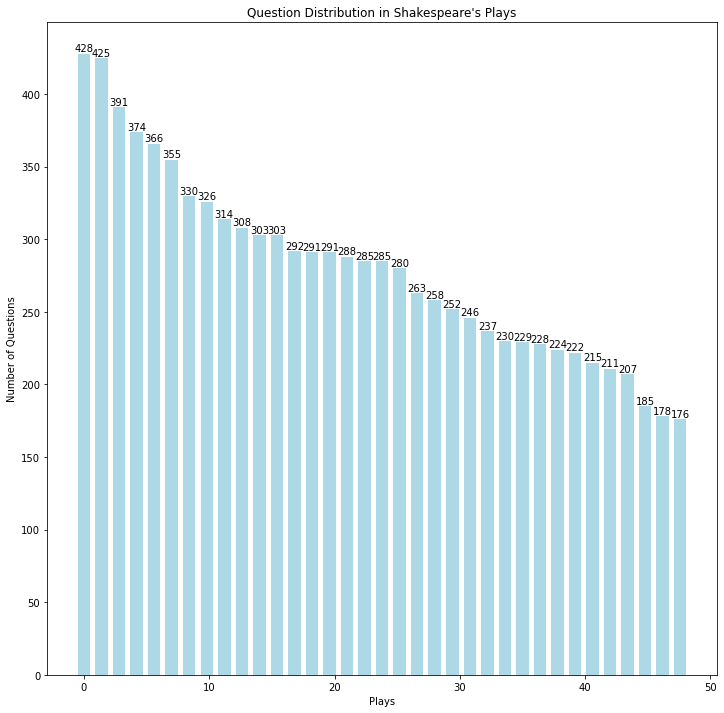

In [21]:
fig, ax = plt.subplots(figsize=(12,12))    
# width = 0.75 # the width of the bars 

question_df = question_df.sort_values(by=['QuestionCount'], ascending=False)
ind = np.arange(len(question_df['QuestionCount'])) 
ax.bar(ind*1.4, question_df['QuestionCount'], color="lightblue", width=1)

for c in ax.containers:
    ax.bar_label(c)
    
plt.title("Question Distribution in Shakespeare's Plays")
plt.xlabel('Plays')
plt.ylabel('Number of Questions') 

plt.show()

Seems more like a linear graph, but we can represent it as Poisson by getting rid of some outliers. The reason I matched it with a Poisson function is because it is skewed to the left.

#### Distribution of questions accross different genres

In [22]:
category_question_df = plays_df.groupby('Category').sum('QuestionCount')
category_question_df

,WordCount,QuestionCount
Category,,
Comedy,278078,3604
History,220444,2367
Tragedy,291193,3825


Text(0, 0.5, 'Number of Questions')

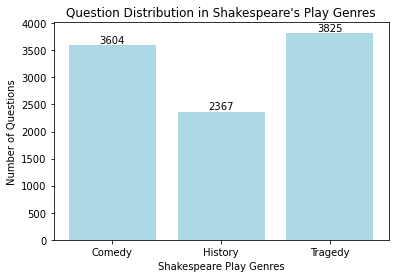

In [23]:
fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(category_question_df['QuestionCount'])) 
ax.bar(ind, category_question_df['QuestionCount'], color="lightblue")
ax.set_xticks(ind)
ax.set_xticklabels(category_question_df.index)

for c in ax.containers:
    ax.bar_label(c)

plt.title("Question Distribution in Shakespeare's Play Genres")
plt.xlabel('Shakespeare Play Genres') 
plt.ylabel('Number of Questions')

## 3. Sentiment Analysis 

I am performing a sentiment analysis of Shakespeare's sentences and finding the sentiment distribution per genre (comedies, tragedies, histories, sonnets). 
I am using the `nrclex` library to identify various sentiments and emotions of the texts. This library returns ten different emotion labels and the probability score of each emotion. The emotions are:
```
fear
anger
anticipation
trust
surprise
positive
negative
sadness
disgust
joy
```

To install the library you can use: 

    pip install NRCLex


Firstly, I am categorising all tokens in the `plays_df` using this library

### Sentiment Analysis in Poems

In [27]:
from nrclex import NRCLex
sentiment_categories = ["fear", "anger", "anticipation", "trust", "surprise", "positive", "negative", "sadness", "disgust", "joy"]

sentiment_list_poem = []

for i, token in enumerate(poem_df['sentences']):
    text_object = NRCLex(token)
    sentiment_values = [0] * 10
    
    for index,c in enumerate(sentiment_categories):
        if c in text_object.raw_emotion_scores: 
            sentiment_values[index] = text_object.raw_emotion_scores[c]
        
    sentiment_list_poem.append(sentiment_values)

poem_df[sentiment_categories] =  sentiment_list_poem
poem_df_filtered = poem_df[sentiment_categories]
poem_df_filtered = list(poem_df_filtered.sum())

Text(0, 0.5, 'Count')

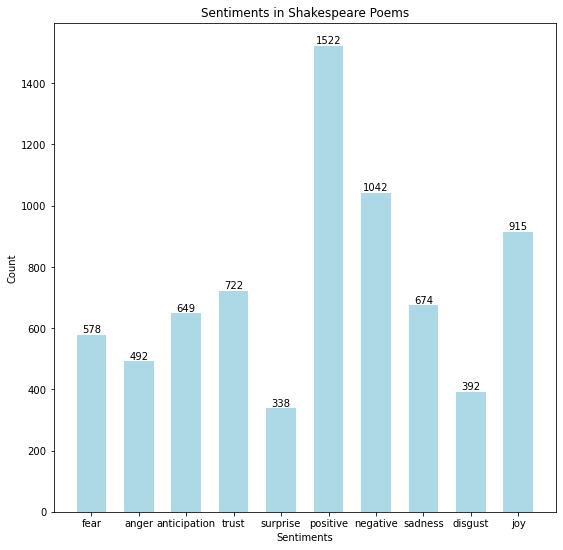

In [28]:
#     sentiment_df_grouped_transposed = sentiment_df_grouped_transposed.sort_values(by=[each_category], ascending=False)
fig, ax = plt.subplots(figsize=(9,9))    
ind = np.arange(len(poem_df_filtered)) 
ax.bar(ind*1.2,poem_df_filtered, color="lightblue", width=0.75)
ax.set_xticks(ind*1.2)
ax.set_xticklabels(sentiment_categories)

for c in ax.containers:
    ax.bar_label(c)

plt.title("Sentiments in Shakespeare Poems" )
plt.xlabel('Sentiments') 
plt.ylabel('Count')

### Sentiment Analysis in Plays

In [29]:
from nrclex import NRCLex
sentiment_list = []

for i, token in enumerate(plays_df['Token']):
    text_object = NRCLex(token)
    sentiment_values = [0] * 10
    
    for index,c in enumerate(sentiment_categories):
#         print(i,c)
        if c in text_object.raw_emotion_scores: 
            sentiment_values[index] = text_object.raw_emotion_scores[c]
        
    sentiment_list.append(sentiment_values)

Below I have appended all the emotion scores as different columns in the dataframe following which I have created a new dataframe `sentiment_df` with the categories and the corresponding emotion scores. 

In [30]:
plays_df[sentiment_categories] =  sentiment_list
plays_df

sentiment_df = plays_df.filter(['Category']+sentiment_categories, axis=1)
sentiment_df

,Category,fear,anger,anticipation,trust,surprise,positive,negative,sadness,disgust,joy
0,History,0,0,0,0,0,0,0,0,0,0
1,History,0,0,0,0,0,0,0,0,0,0
2,History,1,0,2,1,0,1,1,1,0,1
3,History,7,6,2,1,1,6,11,0,3,1
4,History,3,4,1,1,0,7,5,3,0,3
...,...,...,...,...,...,...,...,...,...,...,...
52871,Comedy,0,0,0,1,0,2,2,0,2,0
52872,Comedy,0,0,0,0,0,0,0,0,0,0
52873,Comedy,0,0,0,0,0,0,0,0,0,0
52874,Comedy,1,0,2,1,0,3,0,1,0,2


I grouped the dataframe by the cateogories and transposed it as `sentiment_df_grouped_transposed` so that we can analyse the sentiments in various Shakespeare plays.

In [31]:
sentiment_df_grouped = sentiment_df.groupby('Category').sum()
sentiment_df_grouped_transposed = sentiment_df_grouped.T

In [32]:
sentiment_df_grouped_transposed

Category,Comedy,History,Tragedy
fear,5823,6446,7455
anger,4824,5319,6096
anticipation,7487,5811,7155
trust,11407,9075,11160
surprise,4556,3596,4405
positive,18343,14257,16958
negative,10829,11094,13573
sadness,5485,5780,6852
disgust,4139,4326,5464
joy,8534,5738,7300


#### Plots for various play genres

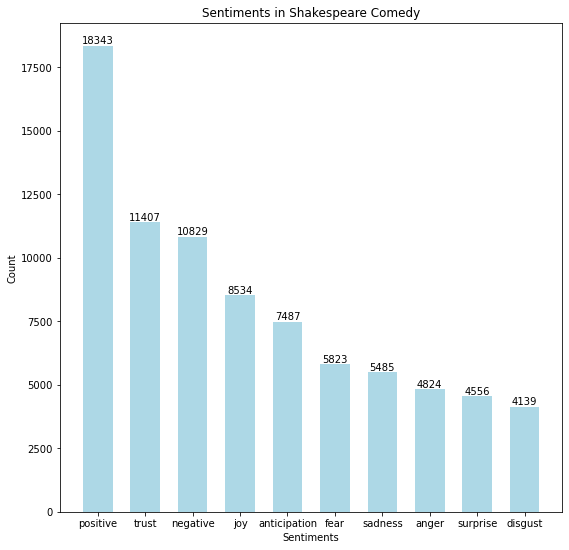

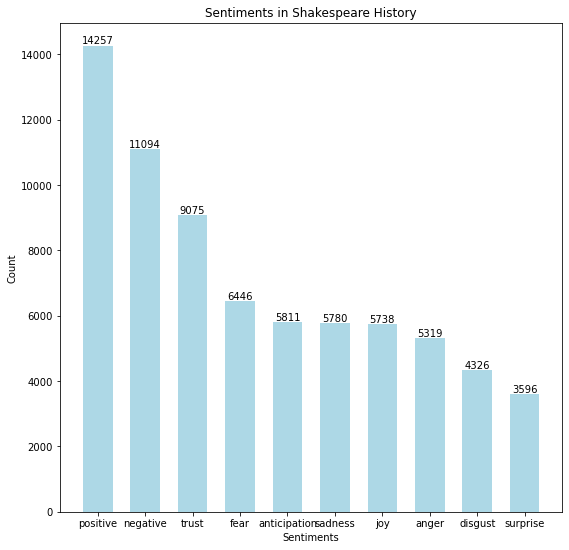

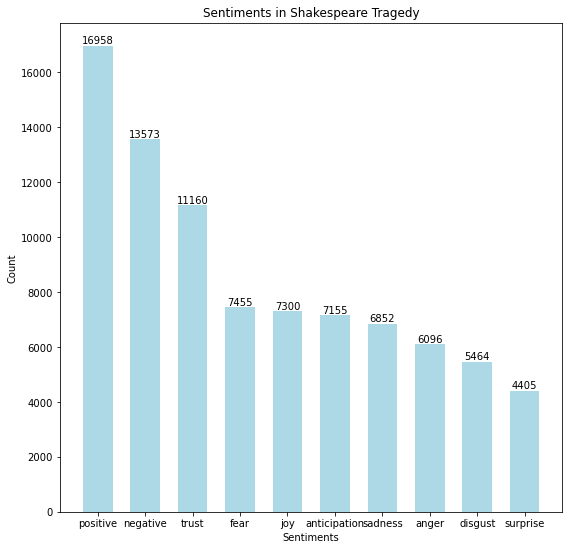

In [33]:
for each_category in ['Comedy','History', 'Tragedy']:
    sentiment_df_grouped_transposed = sentiment_df_grouped_transposed.sort_values(by=[each_category], ascending=False)
    fig, ax = plt.subplots(figsize=(9,9))    
    ind = np.arange(len(sentiment_df_grouped_transposed[each_category])) 
    ax.bar(ind*1.2, sentiment_df_grouped_transposed[each_category], color="lightblue", width=0.75)
    ax.set_xticks(ind*1.2)
    ax.set_xticklabels(sentiment_df_grouped_transposed.index)

    for c in ax.containers:
        ax.bar_label(c)

    plt.title("Sentiments in Shakespeare " + each_category)
    plt.xlabel('Sentiments') 
    plt.ylabel('Count')

## Time Series Analysis
Performing a time series analysis for each genre (i.e. one for drama, one for comedy, one for tragedy) of the 6 main sentiments. 

In my time series analysis of the plays, I am breaking down each play into six parts
* Start (beginning & finish)
* Middle (beginning & finish)
* End (beginning & finish)

I am taking six different sentiments:
* positive (positive, joy, trust) 
* negative (negative, anger, sadness)

In [30]:
def getTimeSeriesPlots(title): 
    test_df = plays_df[plays_df['PlayTitle'] == title] 
    test_df = test_df.reset_index()
    
    fig, ax = plt.subplots(figsize=(20,8))    
    ind = np.arange(len(test_df.index)/2) 

    ax.scatter(ind, test_df['positive'][::2],color="lightgreen",alpha = 0.5)
    ax.scatter(ind, test_df['joy'][::2], color="lightblue",alpha = 0.5)
    ax.scatter(ind, test_df['trust'][::2], color="green",alpha = 0.5)

    ax.scatter(ind, -test_df['negative'][::2],color="red",alpha = 0.5)
    ax.scatter(ind, -test_df['anger'][::2], color="orange",alpha = 0.5)
    ax.scatter(ind, -test_df['sadness'][::2], color="yellow",alpha = 0.5)

    zipped_list = zip(test_df['positive'][::2],test_df['joy'][::2], test_df['trust'][::2],-test_df['negative'][::2],-test_df['anger'][::2], -test_df['sadness'][::2])

    avg_line = [(float(a)+float(b)+float(c)+float(d)+float(e)+float(f))/6 for a, b, c, d, e, f in zipped_list]

    plt.plot(ind, avg_line, color='k', linestyle=':') # average line

    plt.title('Time Series Plot for ' + title + ' (Positive & Negative Scatters)')
    plt.xlabel('PLay Lines') 
    plt.ylabel('Count')
    
    fig, ax = plt.subplots(figsize=(20,8))    
    plt.plot(ind, avg_line, color='k', linestyle=':') # average line
    plt.title('Averaged Plot for ' + title)
    plt.xlabel('Play Lines') 
    plt.ylabel('Count')


### Time Series Analysis of Romeo and Juliet (Tragedy)

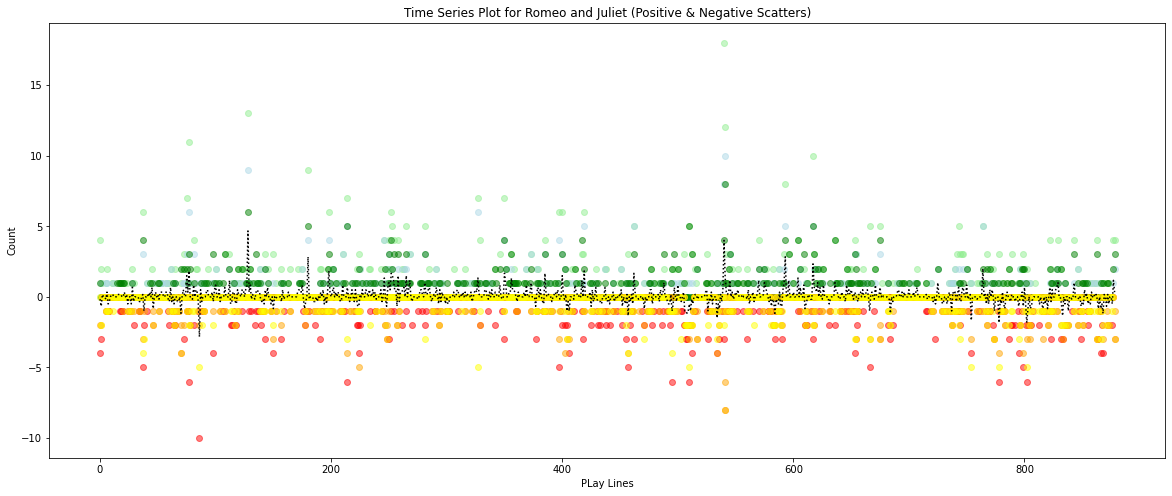

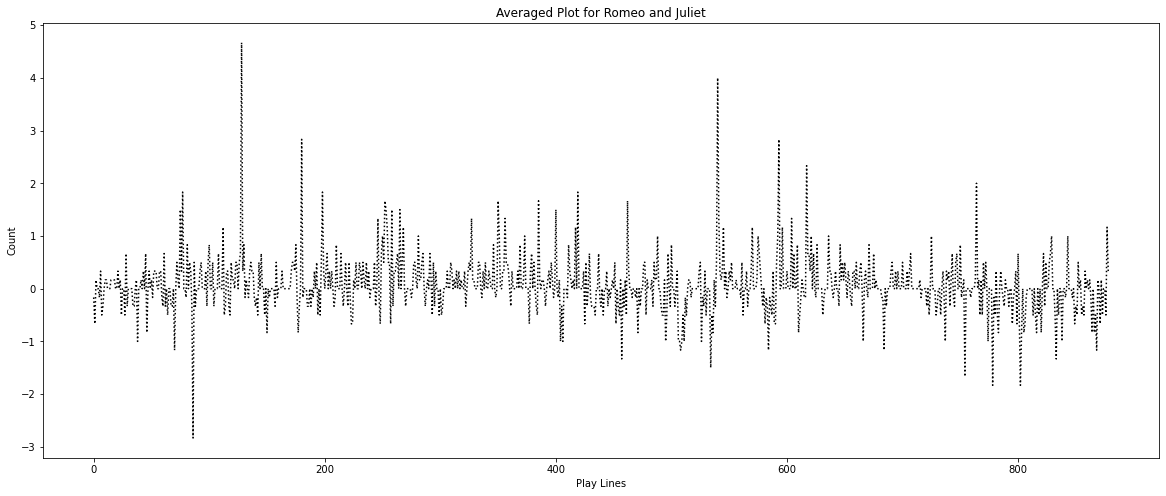

In [31]:
getTimeSeriesPlots('Romeo and Juliet')

**Romeo & Juliet** is a tragic play that starts a little on the negative side and moves into a positive tone. The middle part of the play is majorily neutral but slowly moves positive. The ending is on the negative side (of course, it is justified because it is a tragic play).

### Time Series Analysis of The Comedy of Errors (Comedy)

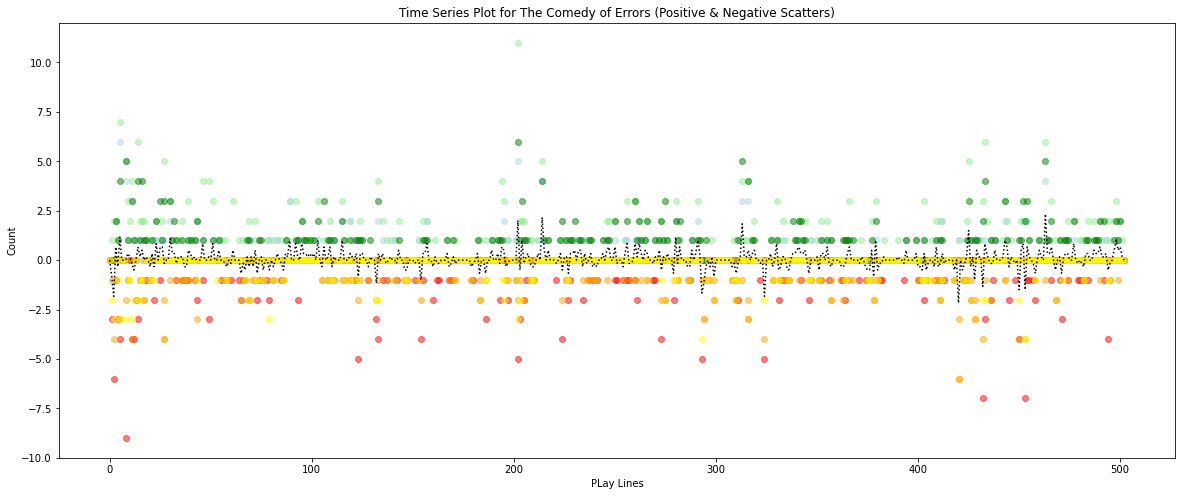

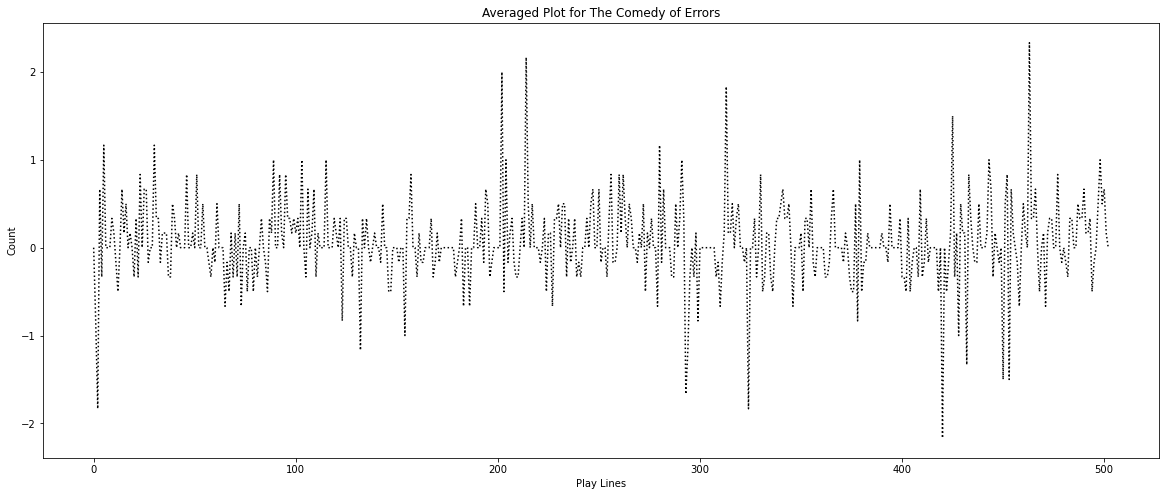

In [32]:
getTimeSeriesPlots("The Comedy of Errors")

**The Comedy of Errors** is a comic play that is neutral for almost the first half (the negative in the beginning seems just like an outlier). The middle of the play is quite positive. The start of the ending has some negative sentiments but the play definitely ends on a positive note.

### Time Series Analysis of Richard III (History)

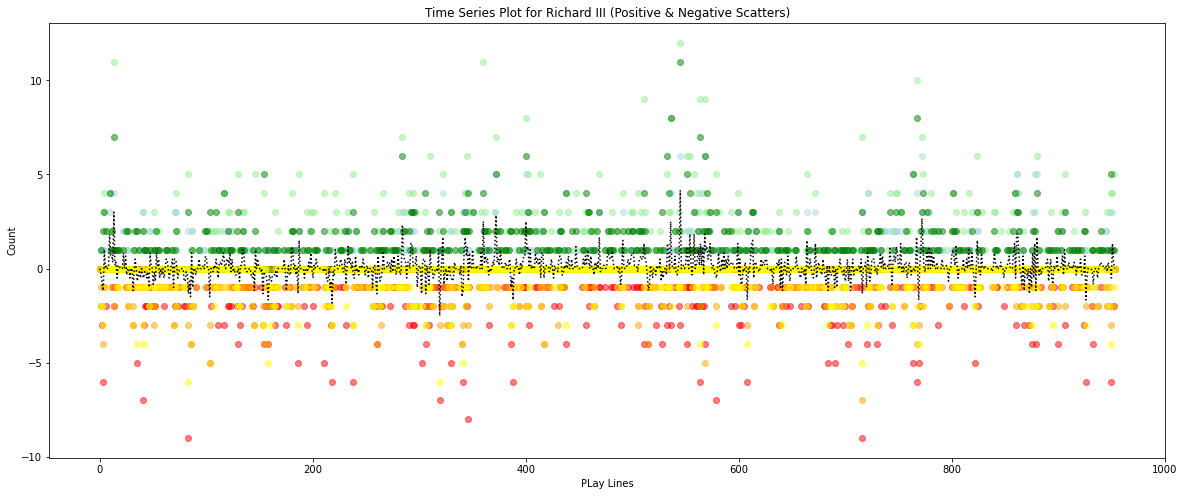

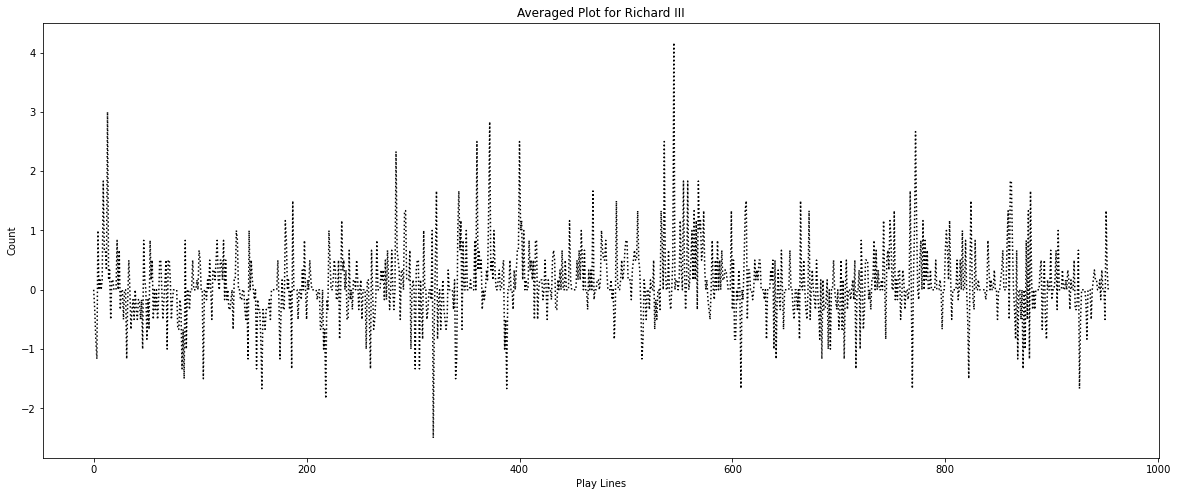

In [33]:
getTimeSeriesPlots("Richard III")

**Richard III** is a historic play that starts on a positive note quickly moves into negative sentiments. It stays on the negative side almost till the mid-play (although there are some positive peaks). In the middle of the play, the positivity peaks but most of the play is quite polarised as per the plot. 

>Conclusion about Shakespeare's works is that his plays are filled with varied emotions. They are a rollercoaster of emotions throughout and no wonder impacted the theatre so much.

My favourite work is **Romeo and Juliet** mainly because it captures how two people (despite their differences) fall in love. They adore each other so deeply that they feel they can't live without each other and commit themselves, believing the other is dead.